## Data Exploration

### Import libraries

In [12]:
import os
import sys
import pandas as pd

### Import dataset

In [13]:
project_path = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_path not in sys.path:
    sys.path.append(project_path)

In [14]:
matthews_df = os.path.join(project_path, "data", "raw", "matthews_auston.csv")
df = pd.read_csv(matthews_df)
df.head(5)

,playerId,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,other,...,0.000,0.176,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,all,...,1.082,1.820,52.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,5on5,...,1.033,1.266,44.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,4on5,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,5on4,...,0.049,0.000,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Columns: 157 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(4), object(6)
memory usage: 3.8+ MB


In [16]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of samples: 3145
Number of features: 157


### Missing values

In [17]:
if df.isna().any().any():
    nan_counts = df.isna().sum()
    nan_counts = nan_counts[nan_counts > 0]
    print("Missing values detected:\n")
    print(nan_counts)
else:
    print("No missing values found.")

No missing values found.


## Univariate analysis

In [25]:
df = df[df["situation"]=="all"]
feature = "gameScore"

### Statistics

In [ ]:
from scipy.stats import skew, kurtosis

print(f"Mean: {df[feature].mean():.3f}")
print(f"Variance: {df[feature].var():.3f}")
print(f"Standard deviation: {df[feature].std(ddof=0):.3f}")
print(f"Skewness: {skew(df[feature]):.3f}")
print(f"Kurtosis: {kurtosis(df[feature])+3:.3f}")

Mean: 1.353
Variance: 1.008
Standard deviation: 1.003
Skewness: 0.473
Kurtosis: 2.998


### Grouped Frequency Table

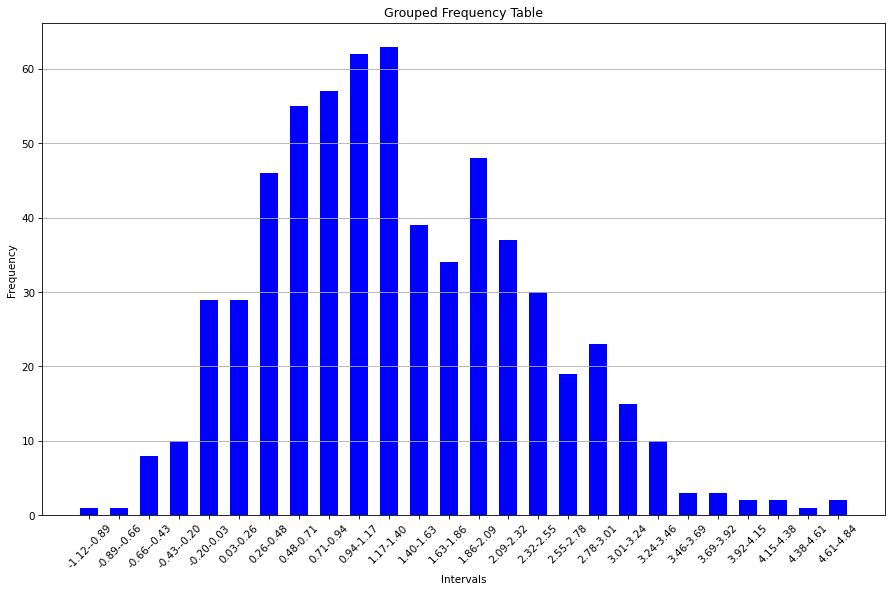

In [31]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.histogram_bin_edges(df[feature], bins="sqrt")
frequencies, edges = np.histogram(df[feature], bins=bins)
    
labels = [f"{edges[i]:.2f}-{edges[i+1]:.2f}" for i in range(len(edges)-1)]
    
plt.figure(figsize=(12,8))
plt.bar(labels, frequencies, width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Intervals")
plt.ylabel("Frequency")
plt.title(f"Grouped Frequency Table")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Cumulative Distribution Function

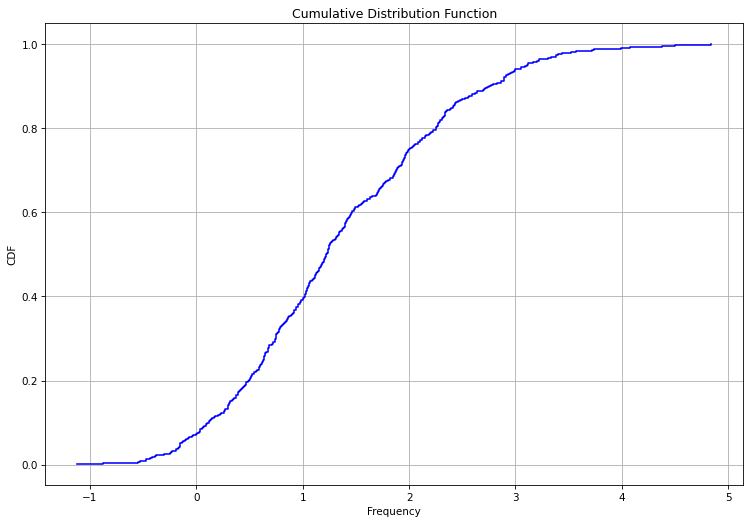

In [35]:
from empiricaldist import Cdf

cdf = Cdf.from_seq(df[feature])

plt.figure(figsize=(12,8))
cdf.step()
plt.title("Cumulative Distribution Function")
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("CDF")
plt.show()

In [36]:
from utils.thinkstats import median, iqr, quartile_skewness

print(f"Median: {median(cdf):.3f}")
print(f"Interquartile range: {iqr(cdf):.3f}")
print(f"Quartile skewness: {quartile_skewness(cdf):.3f}")

Median: 1.220
Interquartile range: 1.360
Quartile skewness: 0.140
